# Libraries

In [35]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer, quantile_transform
import matplotlib.pyplot as plt
from pycaret.regression import *
from pycaret.utils import check_metric
from matplotlib import pyplot as plt
import seaborn as sns

# Metric Function

In [3]:
def metrics_func(true_label,prediction):
    lst = []
    lst.append(check_metric(true_label, prediction,'MAE',))
    lst.append(check_metric(true_label, prediction,'MSE'))
    lst.append(check_metric(true_label, prediction,'RMSE'))
    lst.append(check_metric(true_label, prediction,'R2'))
    lst.append(check_metric(true_label,prediction,'RMSLE'))
    lst.append(check_metric(true_label, prediction,'MAPE'))
    return lst

# Data and Model Loading

In [5]:
# Loading Drug Screening Results
drug_screen_Result = pd.read_csv('../../D2GNets/result/unseen_predict.csv')
#Loading Drug Repurposing Results
GBM_Carmustine = pd.read_csv('../../D2GNets/result/GBM_Carmustine_pred.csv')
GBM_Temozolomide = pd.read_csv('../../D2GNets/result/GBM_Temozolomide_pred.csv')

In [6]:
# load model for Quantaile inverse transformation of Target 
IC50_transformer = load_model('../../D2GNets/models/LNIC50_Model/Final_et_LNIC50_Model_25June2022')

Transformation Pipeline and Model Successfully Loaded


In [7]:
info_cols =['TCGA_DESC', 'SAMPLE_ID',
       'DRUG_NAME', 'LN_IC50_t_Real']
    

In [12]:
metrics = ['MAE','MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']

In [8]:
col = {'LN_IC50_t':'LN_IC50_t_Real',
        'Label':'LN_IC50_t'}
drug_screen_Result.rename(columns=col,inplace=True)
GBM_Carmustine.rename(columns=col,inplace=True)
GBM_Temozolomide.rename(columns=col,inplace=True)

In [9]:
col1 = {'LN_IC50_t':'LN_IC50_t_Predicted',
        'Label':'LN_IC50_Predicted',
      'LN_IC50':'LN_IC50_Real'}

# Drug Repurposing Result of Carmustine

In [10]:
t_pred = predict_model(IC50_transformer, data=GBM_Carmustine[['LN_IC50','LN_IC50_t']])

In [13]:
print(metrics)
print(metrics_func(t_pred.LN_IC50, t_pred.Label))

['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']
[0.5466, 0.4141, 0.6435, 0.5501, 0.0892, 0.0898]


In [14]:
t_pred =pd.concat([GBM_Carmustine[info_cols],t_pred],axis=1)
t_pred.rename(columns=col1,inplace=True)
t_pred.to_csv('../../D2GNets/result/GBM_Carmustine_Result_rescaled_LN_IC50.csv',index=False)

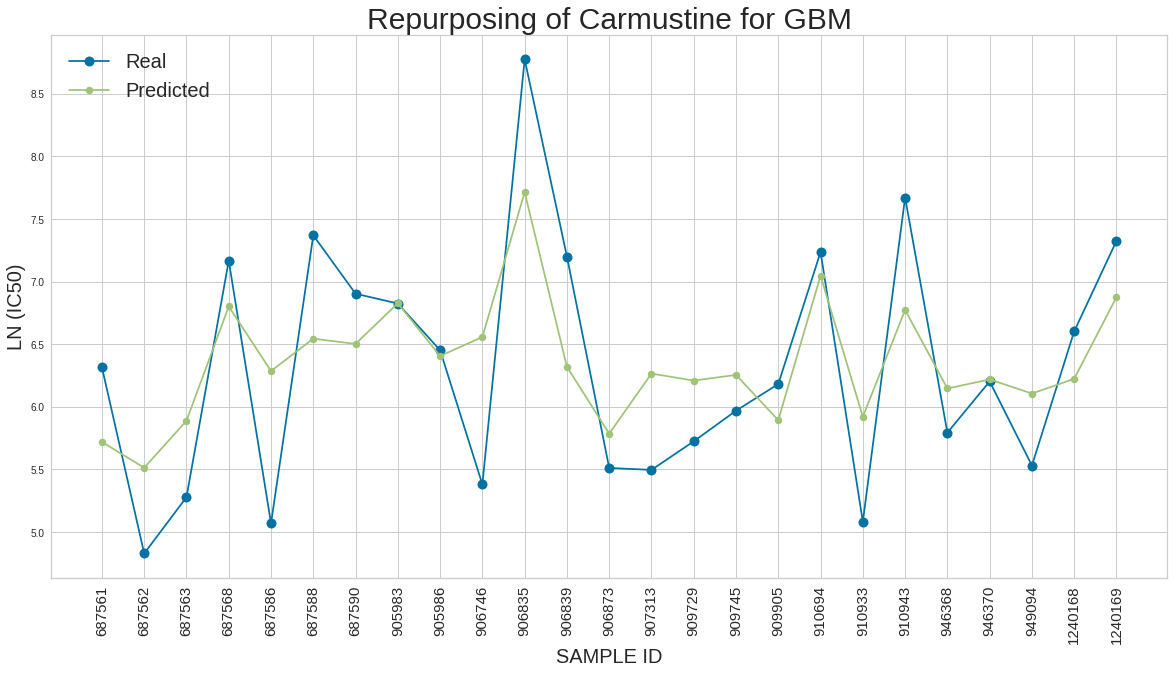

In [33]:
t_predx1 =t_pred.copy(deep=True)
t_predx1['SAMPLE_ID'] = t_predx1['SAMPLE_ID'].astype('string')
t_predx1.rename(columns={'LN_IC50_Real':'Real','LN_IC50_Predicted':'Predicted'},inplace=True)
ax = t_predx1.plot.line(y='Real', figsize=(20, 10), rot=90, marker='.',markersize=20,title='Repurposing of Carmustine for GBM')
t_predx1.plot.line(y='Predicted',figsize=(20, 10), ax=ax,rot=90 , marker='.',markersize=15)
ax.set_xticks(t_predx1.index)
ax.set_xticklabels(t_predx1['SAMPLE_ID'],Fontsize=15)
#ax.set_yticklabels(Fontsize=20)
ax.set_xlabel("SAMPLE ID", fontdict={'fontsize':20})
ax.set_ylabel("LN (IC50)",fontdict={'fontsize':20})
ax.legend(loc=2,fontsize=20)
ax.title.set_size(30)
ax.figure.savefig('../../D2GNets/plots/Carmustine_repurposing.pdf')

# Drug Repurposing Result of Temozolomide

In [15]:
t_pred1 = predict_model(IC50_transformer, data=GBM_Temozolomide[['LN_IC50','LN_IC50_t']])

In [16]:
print(metrics)
metrics_func(t_pred1.LN_IC50, t_pred1.Label)

['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']


[0.4831, 0.374, 0.6116, 0.5901, 0.089, 0.0809]

In [17]:
t_pred1 =pd.concat([GBM_Temozolomide[info_cols],t_pred1],axis=1)
t_pred1.rename(columns=col1,inplace=True)
t_pred1.to_csv('../../D2GNets/result/GBM_Temozolomide_Result_rescaled_LN_IC50.csv',index=False)

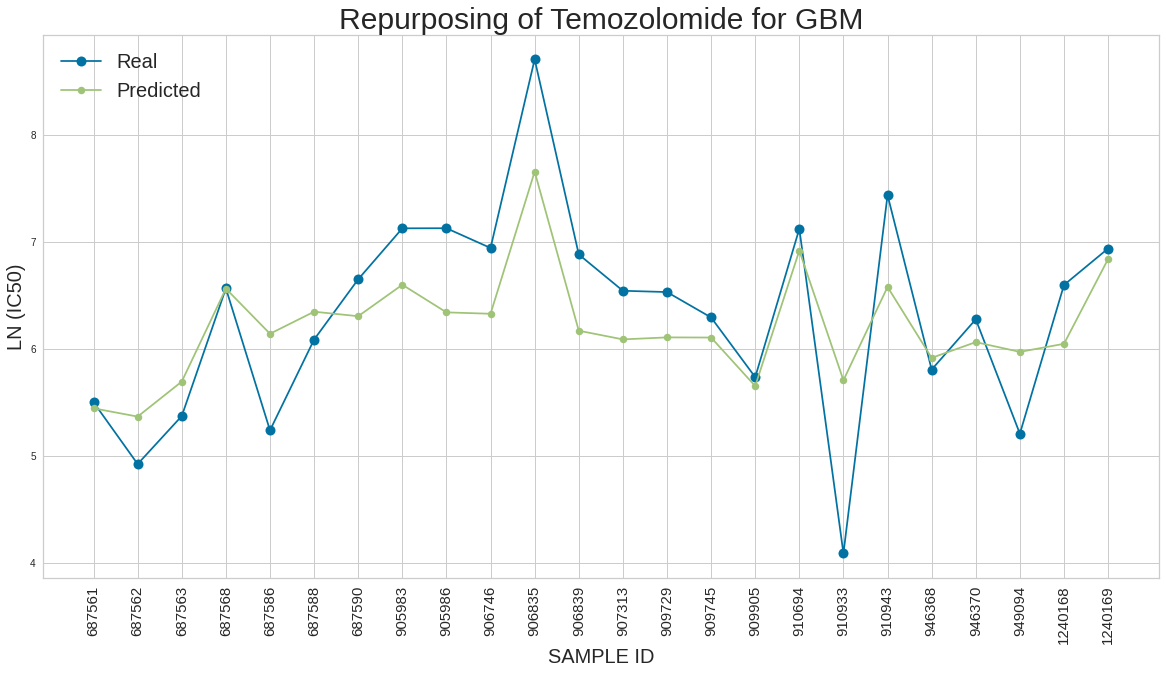

In [34]:
t_predx1 =t_pred1.copy(deep=True)
t_predx1['SAMPLE_ID'] = t_predx1['SAMPLE_ID'].astype('string')
t_predx1.rename(columns={'LN_IC50_Real':'Real','LN_IC50_Predicted':'Predicted'},inplace=True)
ax = t_predx1.plot.line(y='Real', figsize=(20, 10), rot=90, marker='.',markersize=20,title='Repurposing of Temozolomide for GBM')
t_predx1.plot.line(y='Predicted',figsize=(20, 10), ax=ax,rot=90 , marker='.',markersize=15)
ax.set_xticks(t_predx1.index)
ax.set_xticklabels(t_predx1['SAMPLE_ID'],Fontsize=15)
#ax.set_yticklabels(Fontsize=20)
ax.set_xlabel("SAMPLE ID", fontdict={'fontsize':20})
ax.set_ylabel("LN (IC50)",fontdict={'fontsize':20})
ax.legend(loc=2,fontsize=20)
ax.title.set_size(30)
ax.figure.savefig('../../D2GNets/plots/Temozolomide_repurposing.pdf')

In [31]:
# saving results in a data frame for both drugs
repurposeRes = [['Carmustine','GBM']+metrics_func(t_pred.LN_IC50_t_Real, t_pred.LN_IC50_t_Predicted),
                ['Temozolomide','GBM']+metrics_func(t_pred1.LN_IC50_t_Real, t_pred1.LN_IC50_t_Predicted)
            ]
repurposeResDF = pd.DataFrame(repurposeRes, columns=['Drug_Name','TCGS_DESC','MAE', 'MSE', 'RMSE','R2','RMSLE','MAPE'])
repurposeResDF.to_csv('../../D2GNets/result/GBM_Repurposing_RESULT_on_scaled_target.csv',index=False)

In [32]:
repurposeResDF

,Drug_Name,TCGS_DESC,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Carmustine,GBM,0.4341,0.2297,0.4792,-2.8837,0.3273,2.4723
1,Temozolomide,GBM,0.3202,0.1300,0.3605,-2.0407,0.2394,0.8430


# Drug Screening Results

In [21]:
t_pred2 = predict_model(IC50_transformer, data=drug_screen_Result[['LN_IC50','LN_IC50_t']])

In [22]:
print(metrics)
metrics_func(t_pred2.LN_IC50, t_pred2.Label)

['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']


[0.8835, 1.3912, 1.1795, 0.8167, 0.3231, 1.7946]

In [23]:
print(metrics)
metrics_func(drug_screen_Result.LN_IC50_t_Real, drug_screen_Result.LN_IC50_t)

['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']


[0.051, 0.0047, 0.0682, 0.8034, 0.0456, 0.1222]

In [24]:
t_pred2 =pd.concat([drug_screen_Result[info_cols],t_pred2],axis=1)
t_pred2.rename(columns=col1,inplace=True)
t_pred2.to_csv('../../D2GNets/result/drug_screen_Result_rescaled_LN_IC50.csv',index=False)

# Disease-wise Drug Screening Results

In [25]:
tcga_desc = list(drug_screen_Result['TCGA_DESC'].unique())

In [26]:
screenRes =[['TCGA_DESC','MAE', 'MSE', 'RMSE','R2','RMSLE','MAPE']]
for x in tcga_desc:
    tdf = t_pred2[t_pred2['TCGA_DESC']==x]
    res = metrics_func(tdf.LN_IC50_Real, tdf.LN_IC50_Predicted)
    screenRes.append([x] + res)

In [28]:
screenResDF = pd.DataFrame(screenRes[1:],columns=screenRes[0])

In [29]:
screenResDF.to_csv('../../D2GNets/result/TCGS_DESC_DrugSCREEN_RESULT.csv',index=False)

In [30]:
screenRes =[['TCGA_DESC','MAE', 'MSE', 'RMSE','R2','RMSLE','MAPE']]
for x in tcga_desc:
    tdf = t_pred2[t_pred2['TCGA_DESC']==x]
    res = metrics_func(tdf.LN_IC50_t_Real, tdf.LN_IC50_t_Predicted)
    screenRes.append([x] + res)
screenResDF = pd.DataFrame(screenRes[1:],columns=screenRes[0])
screenResDF.to_csv('../../D2GNets/result/TCGS_DESC_DrugSCREEN_RESULT_on_scaled_target.csv',index=False)

# Other Resutls and observations

### Disease Wise Plots for drug perturbations on samples

In [30]:
cancer = list(t_pred2['TCGA_DESC'].unique())

In [23]:
t_pred2['DRUG_CODE'] = t_pred2['DRUG_NAME'].astype('category').cat.codes

In [ ]:
## following code plots multiple plots uncomment the code to generated the plots
'''
for cname in cancer:
    fig, ax = plt.subplots(constrained_layout=True)
    t_predx1 =t_pred2[t_pred2['TCGA_DESC']==cname].copy(deep=True)
    t_predx1.sort_values(by=['DRUG_CODE'],inplace=True)
    t_predx1.reset_index(inplace=True)
    t_predx1.reset_index(inplace=True)
    t_predx1['SAMPLE_ID'] = t_predx1['SAMPLE_ID'].astype('string')

    t_predx1.rename(columns={'LN_IC50_Real':'Real','LN_IC50_Predicted':'Predicted'},inplace=True)
    t_predx1.plot.line(ax=ax,y='Real', rot=90, marker='.',title=f'Drug Screening for {cname}')
    t_predx1.plot.line(y='Predicted', ax=ax,rot=90 , marker='.')
    t_predx1.plot(y='Predicted',x='level_0',kind='scatter',ax=ax)
    #ax.set_xticks(t_predx1.index)
    #ax.set_xticklabels(t_predx1['SAMPLE_ID'],Fontsize=5)
    #ax.set_yticklabels(Fontsize=20)
    ax.set_xlabel("SAMPLES", fontdict={'fontsize':20})
    ax.set_ylabel("LN (IC50)",fontdict={'fontsize':20})
    ax.legend(loc=2,fontsize=10)
    ax.title.set_size(30)
    #secax = ax.secondary_xaxis('top')
    #secax.set_xticks(t_predx1.DRUG_CODE)
    #secax.set_xticklabels(t_predx1.DRUG_CODE,Fontsize=5,rotation = 90)

    ax.figure.savefig(f'../../D2GNets/plots/{cname}_screening.pdf')
'''

### Box-plot for 'COREAD','NB','LGG','LIHC','BRCA','PRAD','KIRC','ESCA','GBM' cancer Types

In [36]:
cancer_list =['COREAD','NB','LGG','LIHC','BRCA','PRAD','KIRC','ESCA','GBM']

In [42]:
df_lst =[]
for x in cancer_list:
    dft = (t_pred2[t_pred2['TCGA_DESC']==x])[['LN_IC50_Real','LN_IC50_Predicted']]
    tdf = pd.DataFrame(dft.values,columns=[f'{x}-Real',f'{x}-Predicted'])
    df_lst.append(tdf)

new_df = pd.concat(df_lst, axis=1)

In [43]:
c_list = []
pal ={}
for x in cancer_list:
    c_list.append(f'{x}-Real')
    pal.update({f'{x}-Real':'g'})
    c_list.append(f'{x}-Predicted')
    pal.update({f'{x}-Predicted':'b'})

In [44]:
#new_df.to_csv('../../D2GNets/plots/result_comparison_.csv')

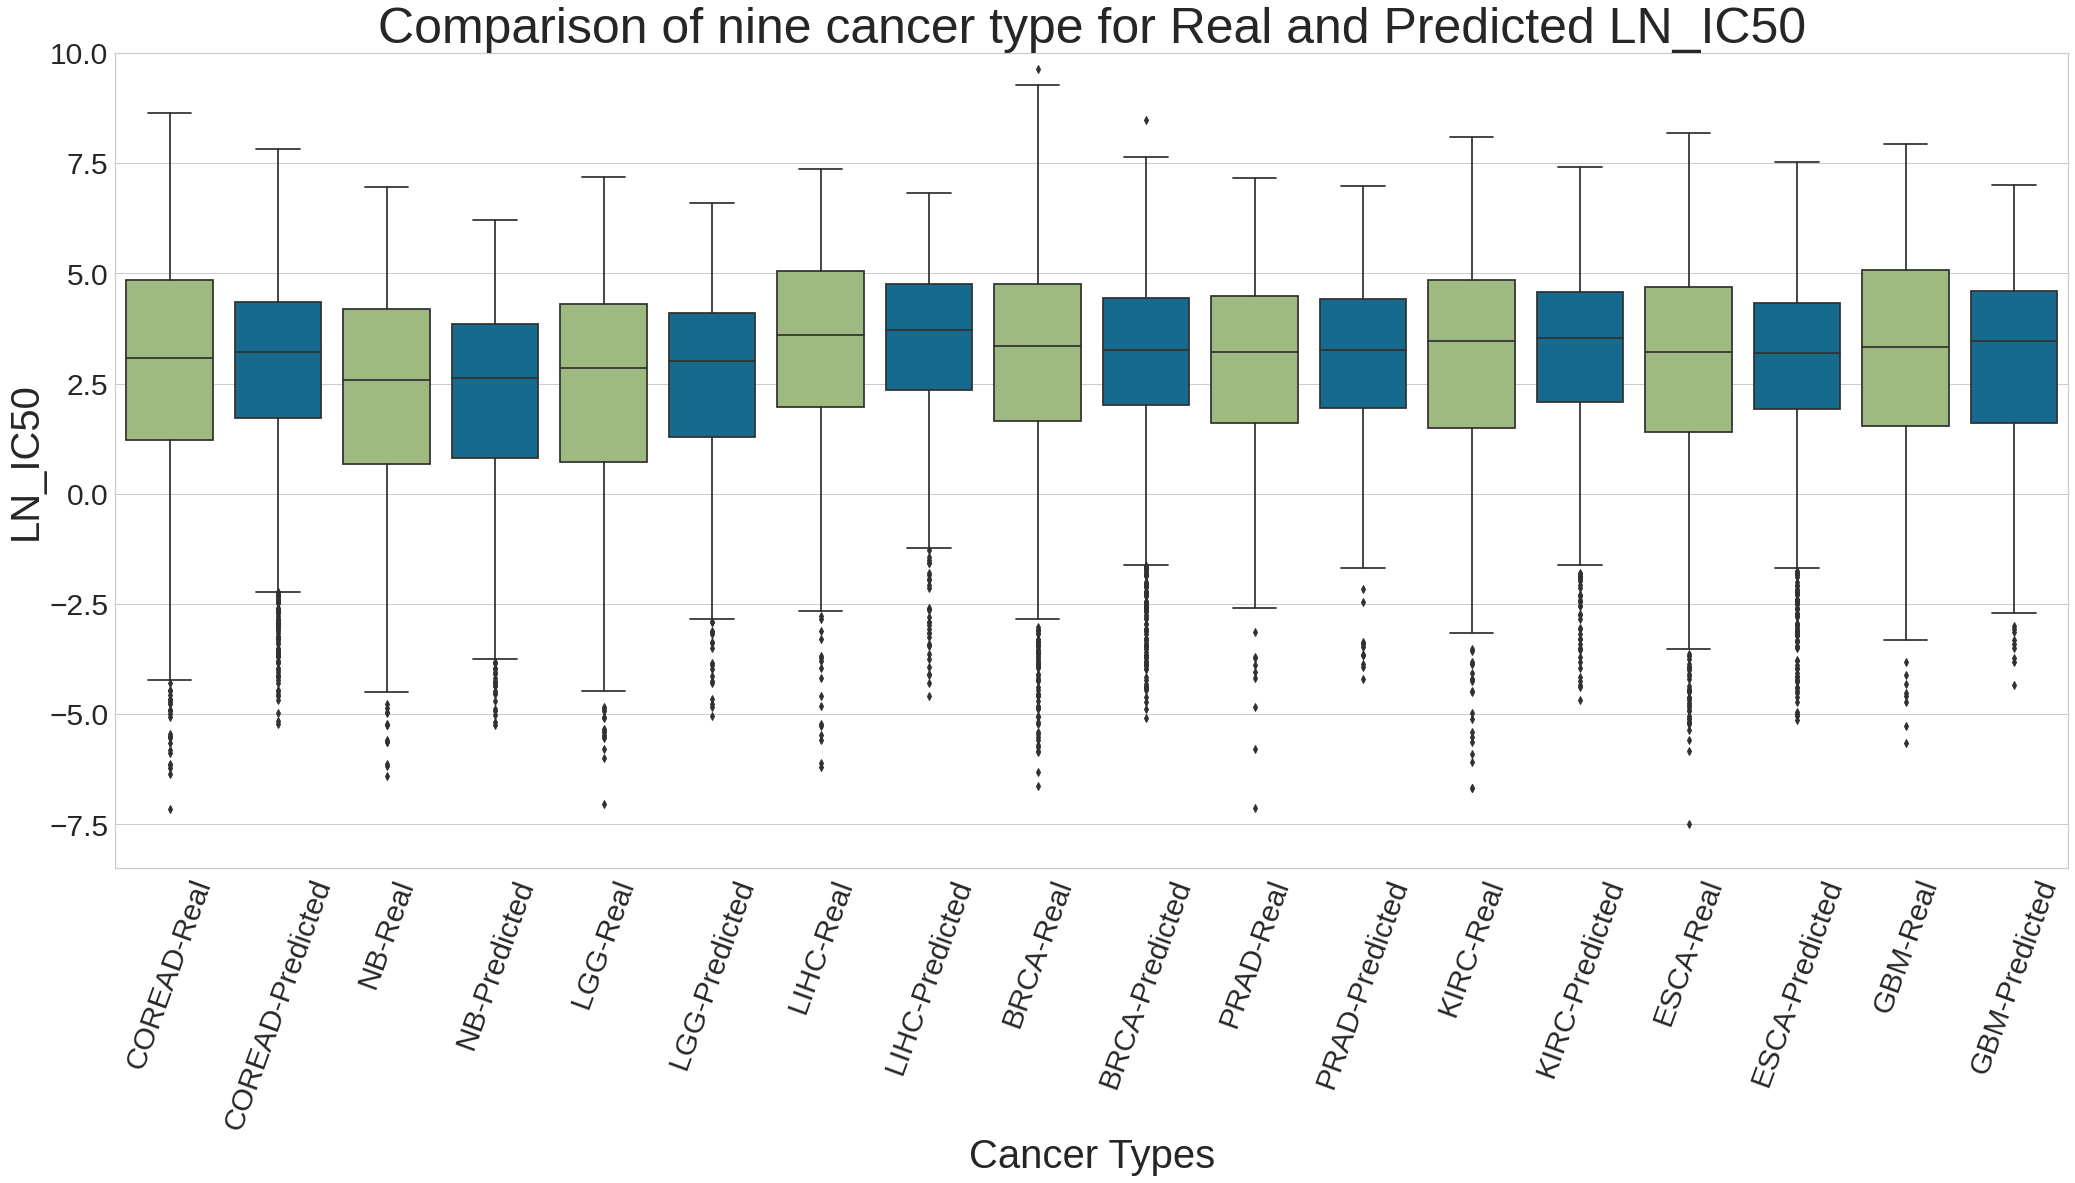

In [45]:
ax = sns.boxplot(data=new_df[c_list], palette=pal)
ax.set_ylabel('LN_IC50',fontsize=40)
ax.set_xlabel('Cancer Types',fontsize=40)
ax.set_title('Comparison of nine cancer type for Real and Predicted LN_IC50',fontsize=50)
ax.set_ylim(-8.5,10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
ax.figure.set_figwidth(35)
ax.figure.set_figheight(15)
ax.tick_params(labelsize=30)
ax.autoscale_view()
ax.figure.savefig(f'../../D2GNets/plots/result_comparison_.pdf')